In [8]:
from tqdm import tqdm
import multiprocessing as mp
import time

def tqdm_worker(queue, num_bars=3):
    
    bar_status = tqdm(desc="Status", position=0)
    bars = []
    for i in range(num_bars):
        bar = tqdm(total=10, desc=f"Progress Bar id: {i}", position=i+1)
        bars.append(bar)

    while True:
        if not queue.empty():
            bar_status.set_postfix_str("updating...")
            item = queue.get()
            id = int(item)
            try:
                bars[id].update(1)
            except IndexError:
                bar_status.set_postfix_str("IndexError")
        bar_status.set_postfix_str("queue empty...")

def update_bars(queue, id, deplay):
    for i in range(10):
        time.sleep(deplay)
        queue.put(id)

q = mp.Queue()

main_p = mp.Process(target=tqdm_worker, args=(q,))
bar_p0 = mp.Process(target=update_bars, args=(q, 0, 0.1))
bar_p1 = mp.Process(target=update_bars, args=(q, 1, 0.2))
bar_p2 = mp.Process(target=update_bars, args=(q, 2, 0.3))

bar_process = [bar_p0, bar_p1, bar_p2]

main_p.start()
# for p in bar_process:
#     p.start()
    
# for p in bar_process:
#     p.join()

time.sleep(5)
    
main_p.terminate()


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/multyxu/miniconda3/envs/general/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/multyxu/miniconda3/envs/general/lib/python3.10/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'tqdm_worker' on <module '__main__' (built-in)>


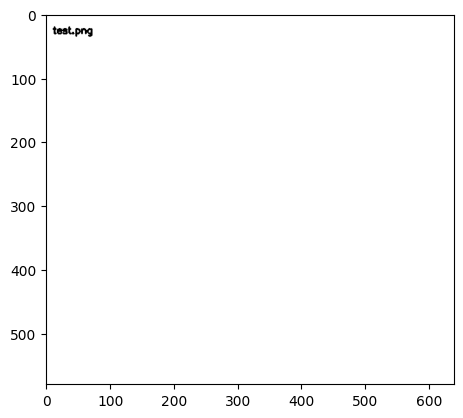

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

save_img = np.ones((480 + 100, 640, 3), dtype=np.uint8) * 255
# plt.text(0, 0, save_img_name, fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5))
save_img = cv2.putText(save_img, "test.png", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
cv2.imwrite("test.png", save_img)
# write a desciription on the image in the top 100 pixel 


plt.imshow(save_img)